# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [165]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [166]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

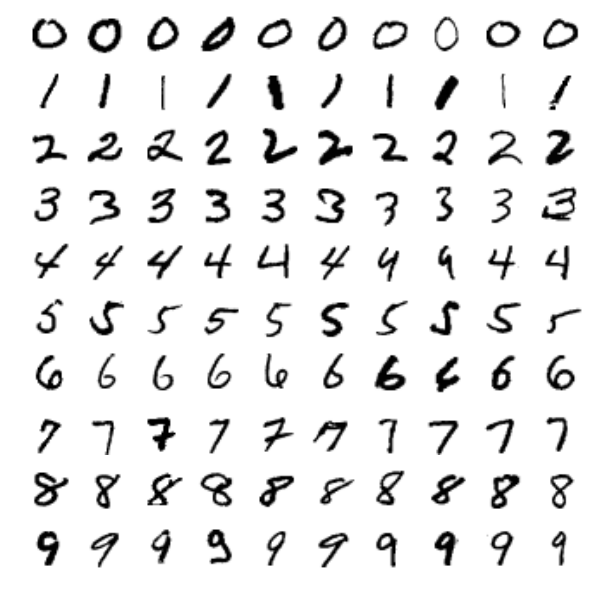

In [167]:
#pick out 10 examples of each numbers
def P1(num_examples=10):
    all_sample = [[], [], [], [], [], [], [], [], [], []]
    for i in range(0, 60000):                            #Choosing the first 10 examples of each number
        for j in range(10):
            if len(all_sample[j]) < num_examples:
                if train_labels[i] == j:
                    all_sample[j].append(i)
    complete_sample = all_sample[0] + all_sample[1] + all_sample[2] + all_sample[3] + all_sample[4] + all_sample[5] + all_sample[6] + all_sample[7] + all_sample[8] + all_sample[9]
    plt.figure(num=3, figsize=(num_examples, num_examples), dpi=280)  
    for k in range(0, 10 * num_examples):
        for m in range(10):
            x = complete_sample[k]
            plt.subplot(num_examples, num_examples, k+1)              #First two variables determine rows and columns, the last determined where a subplot is placed
            reshaped = np.ndarray.reshape(train_data[x], 28, 28)      #Reshaping the 784 points into a 28x28 grid for the picture
            plt.axis("off")
            plt.imshow(reshaped, cmap='binary')

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [168]:
def P2(k_values):
    correct = 0
    incorrect = 0
    for k in k_values:
        KNNC = KNeighborsClassifier(n_neighbors= k)
        KNNC.fit(mini_train_data,mini_train_labels)
        KNNC_prediction = KNNC.predict(dev_data)
        for prediction in range(len(dev_data)):
            if dev_labels[prediction] == KNNC_prediction[prediction]:
                correct = correct + 1
            else:
                incorrect = incorrect + 1
        accuracy = correct / (correct + incorrect)
        print("The accuracy for k =", k, "is", accuracy)

    KNNC_k = KNeighborsClassifier(n_neighbors= 1)
    KNNC_k.fit(mini_train_data,mini_train_labels)
    KNNC_k_prediction = KNNC.predict(dev_data)

    print("Precision, recall, and F1 for each label with k = 1")
    print(classification_report(dev_labels,KNNC_k_prediction))

k_values = [1, 3, 5, 7, 9]
P2(k_values)

The accuracy for k = 1 is 0.888
The accuracy for k = 3 is 0.883
The accuracy for k = 5 is 0.8783333333333333
The accuracy for k = 7 is 0.875
The accuracy for k = 9 is 0.8726
Precision, recall, and F1 for each label with k = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.73      1.00      0.84       105
        2.0       0.97      0.75      0.85       102
        3.0       0.80      0.85      0.82        86
        4.0       0.91      0.81      0.86       104
        5.0       0.97      0.79      0.87        91
        6.0       0.92      0.93      0.92        98
        7.0       0.83      0.88      0.85       113
        8.0       0.94      0.79      0.86        96
        9.0       0.78      0.84      0.81       106

avg / total       0.88      0.86      0.86      1000



ANSWER: The most difficult label to get is the 1.0 (based on the precision, the percentage of positives correctly identified). However, 1.0 has a perfect recall rate, and 9.0 has the worst F-score (a combination of precision and accuracy).

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [169]:
def P3(train_sizes, accuracies):
    KNNC = KNeighborsClassifier(n_neighbors= 1)
    for size in train_sizes:
        start = time.time()
        correct = 0
        incorrect = 0
        KNNC.fit(train_data[0:size], train_labels[0:size])
        KNNC_prediction = KNNC.predict(dev_data)
        for prediction in range(len(dev_data)):
            if dev_labels[prediction] == KNNC_prediction[prediction]:
                correct = correct + 1
            else:
                incorrect = incorrect + 1
        accuracy = correct / (correct + incorrect)
        accuracies.append(accuracy)
        finish = time.time()
        time_length = finish-start
        print("The accuracy for training size =", size, "is", accuracy,". It took", time_length, "seconds.")

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

The accuracy for training size = 100 is 0.72 . It took 0.16260504722595215 seconds.
The accuracy for training size = 200 is 0.786 . It took 0.22170162200927734 seconds.
The accuracy for training size = 400 is 0.841 . It took 0.476428747177124 seconds.
The accuracy for training size = 800 is 0.884 . It took 1.211620569229126 seconds.
The accuracy for training size = 1600 is 0.902 . It took 2.629833459854126 seconds.
The accuracy for training size = 3200 is 0.926 . It took 6.64700174331665 seconds.
The accuracy for training size = 6400 is 0.937 . It took 13.303483486175537 seconds.
The accuracy for training size = 12800 is 0.959 . It took 33.16494178771973 seconds.
The accuracy for training size = 25000 is 0.97 . It took 57.85326433181763 seconds.


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Coefficients: 
 [  6.66527139e-06]
Prediction for 60000:  [ 1.24307226]


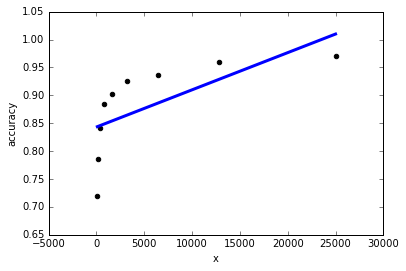

Coefficients: 
 [ 0.04226926]
Prediction for 60000:  [ 1.03386514]


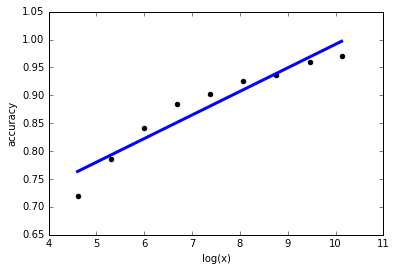

In [170]:
def P4():
    train_sizes_array = np.asarray(train_sizes)
    train_sizes_matrix = train_sizes_array[:, np.newaxis]
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_sizes_matrix, accuracies)
    print('Coefficients: \n', lr.coef_)
    print("Prediction for 60000: ", lr.predict(60000))

    #Graph the data to investigate what might be a proper transformation
    plt.scatter(train_sizes_matrix, accuracies,  color='black')
    plt.plot(train_sizes_matrix, lr.predict(train_sizes_matrix), color='blue',
         linewidth=3)
    plt.xlabel("x")
    plt.ylabel("accuracy")
    plt.show()

    #Do log transformation
    train_sizes_array2 = np.asarray(np.log(train_sizes))
    train_sizes_matrix2 = train_sizes_array2[:, np.newaxis]
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_sizes_matrix2, accuracies)
    print('Coefficients: \n', lr.coef_)
    print("Prediction for 60000: ", lr.predict(np.log(60000)))
    plt.scatter(train_sizes_matrix2, accuracies,  color='black')
    plt.plot(train_sizes_matrix2, lr.predict(train_sizes_matrix2), color='blue',
         linewidth=3)
    plt.xlabel("log(x)")
    plt.ylabel("accuracy")
    plt.show()

P4()

ANSWER: What was wrong with the original regression is that it was predicting a prediction rate of well over 100% for a training set with 60,000. I choose to transform the training set size by taking its log. This makes more sensible prediction results for 60,000, although it's still a little over 100%. Log is a sensible transformation due to the natural skew of the untransformed data.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

The accuracy for k = 1 is 0.888
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
The most confused pair of digits is 9 and 4, with 14 4s mistaken as 9s and 9 9s mistaken as 4s. Here are all the examples of   the mistaken digits.


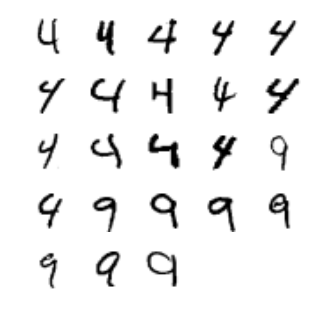

In [176]:
def P5():
    k = [1]
    correct = 0
    incorrect = 0
    print_list_4 = []
    print_list_9 = []
    for k_i in k:
        KNNC = KNeighborsClassifier(n_neighbors= k_i)
        KNNC.fit(mini_train_data,mini_train_labels)
        KNNC_prediction = KNNC.predict(dev_data)
        for prediction in range(len(dev_data)):
            if dev_labels[prediction] == KNNC_prediction[prediction]:
                correct = correct + 1
            else:
                incorrect = incorrect + 1
                if dev_labels[prediction] == 4 and KNNC_prediction[prediction] == 9:   #Pull out the mistakes
                    print_list_4.append(prediction)
                if dev_labels[prediction] == 9 and KNNC_prediction[prediction] == 4:
                    print_list_9.append(prediction)    
        accuracy = correct / (correct + incorrect)
        print("The accuracy for k =", k_i, "is", accuracy)

    print(confusion_matrix(dev_labels, KNNC_prediction))
    print("The most confused pair of digits is 9 and 4, with 14 4s mistaken as 9s and 9 9s mistaken as 4s. Here are all the examples of   the mistaken digits.")
    complete_list = print_list_4 + print_list_9
    plt.figure(num=3, figsize=(5, 5), dpi=280)  
    for j in range(len(complete_list)):
        x = complete_list[j]
        plt.subplot(5, 5, j+1)
        reshaped = np.ndarray.reshape(dev_data[x], 28, 28)
        plt.axis("off")
        plt.imshow(reshaped, cmap='binary')
        plt.figure(num=3, figsize=(2, 10), dpi=280)  

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [177]:
def P6():
    gaussian_blur_train = mini_train_data.copy()         #Creating these so they don't overwrite the originals for later use
    gaussian_blur_dev = dev_data.copy()
    for i in range(len(mini_train_data)):          #Iterate through whole examples of mini_train_data by count
#            print(gaussian_blur_train[i])
        for j in range(len(mini_train_data[i])):       #Iterate through 784 numbers
#            print(j)
            if j == 0:                            #Take the placement 0, 1, 28, 29 (Average them together)
                sums = (2 * mini_train_data[i][j]+mini_train_data[i][j+1]+mini_train_data[i][j+28]+mini_train_data[i][j+29])
                average = sums/5
            elif j == 27:                        #Take the placement -1, 0, 27, 28 (Average them together)
                sums = (mini_train_data[i][j-1]+2 * mini_train_data[i][j]+mini_train_data[i][j+27]+mini_train_data[i][j+28])
                average = sums/5
            elif j == 756:                       #Take the placement -28, -27, 0, 1 (Average them together)
                sums = (mini_train_data[i][j-28]+mini_train_data[i][j-27]+2 * mini_train_data[i][j]+mini_train_data[i][j+1])
                average = sums/5
            elif j == 783:                        #Take the placement -29, -28, -1, 0 (Average them together)
                sum = (mini_train_data[i][j-29]+mini_train_data[i][j-28]+mini_train_data[i][j-1]+2 * mini_train_data[i][j])
                average = sums/5
            elif j < 28:             #top row    #Take the placement -1, 0, 1, 27, 28, 29 (Average them together)
                sums = (mini_train_data[i][j-1]+2 * mini_train_data[i][j]+mini_train_data[i][j+1]+
                        mini_train_data[i][j+27]+mini_train_data[i][j+28]+mini_train_data[i][j+29])
                average = sums/7
            elif j > 756:            #bottom row   #Take the placement -29, -28, -27, -1, 0, 1 (Average them together)
                sum = (mini_train_data[i][j-29]+mini_train_data[i][j-28]+mini_train_data[i][j-27]+
                        mini_train_data[i][j-1]+2 * mini_train_data[i][j]+mini_train_data[i][j+1])
                average = sums/7
            elif j % 28 == 0:   #left row     #Take the placement -28, -27, 0, 1, 28, 29 (Average them together)
                sums = (mini_train_data[i][j-28]+mini_train_data[i][j-27]+2 * mini_train_data[i][j]+
                       mini_train_data[i][j+1]+mini_train_data[i][j+28]+mini_train_data[i][j+29])
                average = sums/7
            elif (j+1) % 28 == 0:       #right row    #Take the placement -29, -28, -1, 0, 27, 28 (Average them together)
                sums = (mini_train_data[i][j-29]+mini_train_data[i][j-28]+mini_train_data[i][j-1]+
                       2 * mini_train_data[i][j]+mini_train_data[i][j+27]+mini_train_data[i][j+28])
                average = sums/7
            else:
                sums = (mini_train_data[i][j-29]+mini_train_data[i][j-28]+mini_train_data[i][j-27]+
                       mini_train_data[i][j-1]+2 * mini_train_data[i][j]+mini_train_data[i][j+1]+
                       mini_train_data[i][j+27]+mini_train_data[i][j+28]+mini_train_data[i][j+29])
                average = sums/10
            gaussian_blur_train[i][j] = average
    for i in range(len(dev_data)):          #Iterate through whole examples of mini_train_data by count
        for j in range(len(dev_data[i])):       #Iterate through 784 numbers
            if j == 0:                            #Take the placement 0, 1, 28, 29 (Average them together)
                sums = (2 * dev_data[i][j]+dev_data[i][j+1]+dev_data[i][j+28]+dev_data[i][j+29])
                average = sums/5
            elif j == 27:                        #Take the placement -1, 0, 27, 28 (Average them together)
                sums = (dev_data[i][j-1]+2 * dev_data[i][j]+dev_data[i][j+27]+dev_data[i][j+28])
                average = sums/5
            elif j == 756:                       #Take the placement -28, -27, 0, 1 (Average them together)
                sums = (dev_data[i][j-28]+dev_data[i][j-27]+2 * dev_data[i][j]+dev_data[i][j+1])
                average = sums/5
            elif j == 783:                        #Take the placement -29, -28, -1, 0 (Average them together)
                sum = (dev_data[i][j-29]+dev_data[i][j-28]+dev_data[i][j-1]+2 * dev_data[i][j])
                average = sums/5
            elif j < 28:             #top row    #Take the placement -1, 0, 1, 27, 28, 29 (Average them together)
                sums = (dev_data[i][j-1]+2 * dev_data[i][j]+dev_data[i][j+1]+
                        dev_data[i][j+27]+dev_data[i][j+28]+dev_data[i][j+29])
                average = sums/7
            elif j > 756:            #bottom row   #Take the placement -29, -28, -27, -1, 0, 1 (Average them together)
                sum = (dev_data[i][j-29]+dev_data[i][j-28]+dev_data[i][j-27]+
                        dev_data[i][j-1]+2 * dev_data[i][j]+dev_data[i][j+1])
                average = sums/7
            elif j % 28 == 0:   #left row     #Take the placement -28, -27, 0, 1, 28, 29 (Average them together)
                sums = (dev_data[i][j-28]+dev_data[i][j-27]+2 * dev_data[i][j]+
                       dev_data[i][j+1]+dev_data[i][j+28]+dev_data[i][j+29])
                average = sums/7
            elif (j+1) % 28 == 0:       #right row    #Take the placement -29, -28, -1, 0, 27, 28 (Average them together)
                sums = (dev_data[i][j-29]+dev_data[i][j-28]+dev_data[i][j-1]+
                       2 * dev_data[i][j]+dev_data[i][j+27]+dev_data[i][j+28])
                average = sums/7
            else:
                sums = (dev_data[i][j-29]+dev_data[i][j-28]+dev_data[i][j-27]+
                       dev_data[i][j-1]+2 * dev_data[i][j]+dev_data[i][j+1]+
                       dev_data[i][j+27]+dev_data[i][j+28]+dev_data[i][j+29])
                average = sums/10
            gaussian_blur_dev[i][j] = average

 
    KNNC = KNeighborsClassifier(n_neighbors= 1)
    KNNC.fit(gaussian_blur_train,mini_train_labels)
    KNNC_prediction = KNNC.predict(gaussian_blur_dev)
    right_predictions1 = (KNNC_prediction == dev_labels)
    accuracy1 = float(np.sum(right_predictions1))/len(right_predictions1)
    print("The accuracy with both data sets blurred is", accuracy1)

    KNNC = KNeighborsClassifier(n_neighbors= 1)
    KNNC.fit(gaussian_blur_train,mini_train_labels)
    KNNC_prediction = KNNC.predict(dev_data)
    right_predictions2 = (KNNC_prediction == dev_labels)
    accuracy2 = float(np.sum(right_predictions2))/len(right_predictions2)
    print("The accuracy for the blurred training data is", accuracy2)
    
    KNNC = KNeighborsClassifier(n_neighbors= 1)
    KNNC.fit(mini_train_data,mini_train_labels)
    KNNC_prediction = KNNC.predict(gaussian_blur_dev)
    right_predictions3 = (KNNC_prediction == dev_labels)
    accuracy3 = float(np.sum(right_predictions3))/len(right_predictions3)
    print("The accuracy for the blurred development data is", accuracy3)  

P6()

The accuracy with both data sets blurred is 0.901
The accuracy for the blurred training data is 0.905
The accuracy for the blurred development data is 0.876


ANSWER: The best result was blurring just the training data. All 3 blurs improved over the non-blurred models. In terms of weight, I gave the original data point twice the weight of the surrounding points. If I used a pure average, the accuracies would have been .902, .909, and .871 (so the weighting improved the blurred development set accuracy, but lessened the other two accuracies).

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [178]:
def P7():
    def multiknome_data(data, thresholds=[0, 1]):
    # Initialize a new feature array with the same shape as the original data.
        multiknome_data = np.zeros(data.shape)
    # Apply a threshold  to each feature.
        for feature in range(1000):
            for x in range(784):
                if data[feature][x] >= (thresholds[1]):
                    multiknome_data[feature][x] = 2
                if data[feature][x] >= (thresholds[0]) and data[feature][x] < (thresholds[1]):
                    multiknome_data[feature][x] = 1
        return multiknome_data    
    
    multiknome_mini_train_data = multiknome_data(mini_train_data, [0.333, 0.666])
    multiknome_dev_data = multiknome_data(dev_data, [0.333, 0.666])

    bernoulli_test = BernoulliNB(binarize = 0.2)
    bernoulli_test.fit(mini_train_data, mini_train_labels)
    bernoulli_results = bernoulli_test.predict(dev_data)

    right_predictions_b = (bernoulli_results == dev_labels)
    accuracies_b = float(np.sum(right_predictions_b))/len(right_predictions_b)
    print("The bernoulli naive bayes accuracy is:", accuracies_b)

    multinomial_test = MultinomialNB()
    multinomial_test.fit(multiknome_mini_train_data, mini_train_labels)
    multinomial_results = multinomial_test.predict(multiknome_dev_data)

    right_predictions_m = (multinomial_results == dev_labels)
    accuracies_m = float(np.sum(right_predictions_m))/len(right_predictions_m)
    print("The multinomial naive bayes accuracy is:", accuracies_m)
    
P7()

The bernoulli naive bayes accuracy is: 0.821
The multinomial naive bayes accuracy is: 0.803


ANSWER: The multiclass version has slightly worse results. This could be because the multiclass version has more variance among it's data points, which could lead to slightly worse predictive accuracy.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [179]:
def P8(alphas):
    bernoulli_8 = BernoulliNB(binarize = 0.2)
    grid = GridSearchCV(estimator=bernoulli_8, param_grid = alphas)        #, cv = 10, scoring = "accuracy")
    grid.fit(mini_train_data, mini_train_labels)
    print(grid.best_score_)
    print(grid.best_estimator_.alpha)
    print (grid.grid_scores_)
    return grid

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


0.824
0.01
[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.82000, std: 0.02208, params: {'alpha': 0.0001}, mean: 0.82300, std: 0.02206, params: {'alpha': 0.001}, mean: 0.82400, std: 0.01862, params: {'alpha': 0.01}, mean: 0.82300, std: 0.02060, params: {'alpha': 0.1}, mean: 0.81800, std: 0.01708, params: {'alpha': 0.5}, mean: 0.81800, std: 0.01328, params: {'alpha': 1.0}, mean: 0.80400, std: 0.01341, params: {'alpha': 2.0}, mean: 0.75700, std: 0.01730, params: {'alpha': 10.0}]


In [180]:
print (nb.best_params_)

{'alpha': 0.01}


ANSWER: The accuracy when alpha is 0 is 0.092. This is extremely poor and is to be expected, because without smoothing, it's hard to store because when properties are multiplied and the myriad 0s wipe everything out when multiplied. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [185]:
def P9():
    gaussian_test = GaussianNB()
    gaussian_test.fit(mini_train_data, mini_train_labels)
    gaussian_results = gaussian_test.predict(dev_data)
    right_predictions = (gaussian_results == dev_labels)
    wrong_labels = []
    wrong_labels2 = []
    for k in range(1000):
        if right_predictions[k] == False:
            wrong_labels.append(k)
            wrong_labels2.append(dev_labels[k])
    accuracies = float(np.sum(right_predictions))/len(right_predictions)
    print("The unaltered model accuracy is:", accuracies)
    for i in range(10):
        for j in range(784):
            gaussian_test.theta_[i][j] *= 2
            gaussian_test.sigma_[i][j] += 0.0075
    
    gaussian_results = gaussian_test.predict(dev_data)
    right_predictions = (gaussian_results == dev_labels)
    accuracies = float(np.sum(right_predictions))/len(right_predictions)
    print("The altered model accuracy is:", accuracies)  
    
gnb = P9()



The unaltered model accuracy is: 0.621
The altered model accuracy is: 0.756


ANSWER: By doubling the theta and increasing sigma slightly, the accuracy improved. This is because the theta and sigma often had very small values, which may have made it hard for the model to make distinctions. Both these needed to be increased to get an effect that neared Bernoulli predictive accuracy (although it's still a bit off).

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

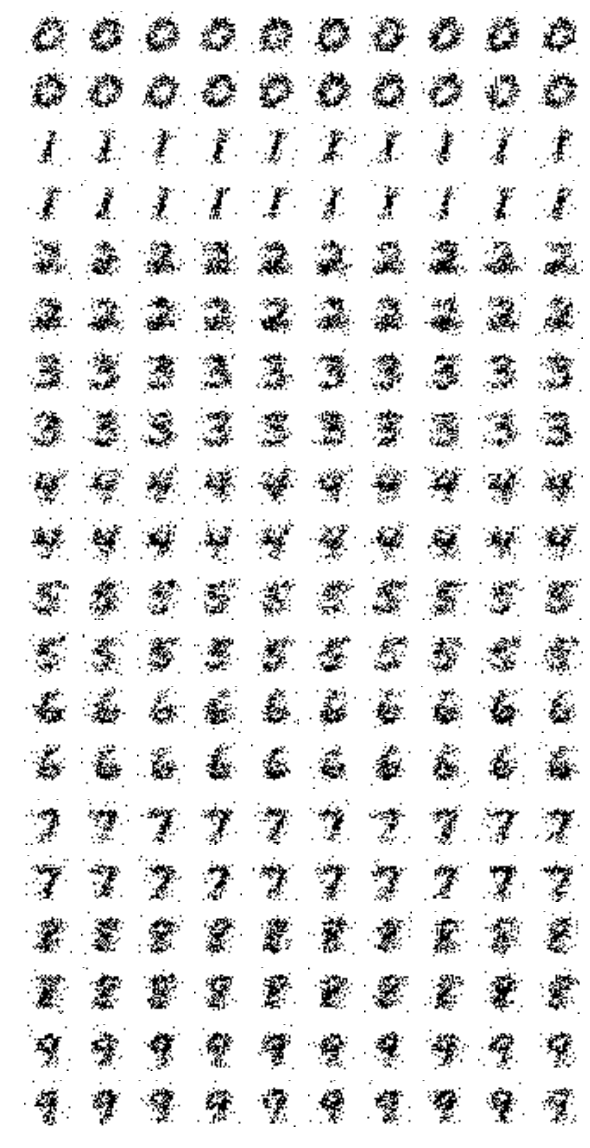

In [182]:
def P10(num_examples):
    bernoulli_test10 = BernoulliNB(binarize = 0.2)
    bernoulli_test10.fit(mini_train_data, mini_train_labels)
    bernoulli_results = bernoulli_test10.predict(dev_data)

    probability_list = []                 #Creating a list to append all the probablities for each digit 
    for i in range(10):
        probability_list.append(np.exp(bernoulli_test10.feature_log_prob_[i]))

    complete_sample = []
    for l in range(10):                               #Creating the 200 examples to be printed
        for m in range(num_examples):
            check = np.random.rand(1, 784)
            sample = (1 * ((probability_list[l]) > check))       #1 * converts from true/false to 1/0
            complete_sample.append(sample)    

    plt.figure(num=3, figsize=(10, num_examples), dpi=280)  
    for j in range(0, num_examples * 10):
        plt.subplot(num_examples, 10, j+1)
        reshaped = np.ndarray.reshape(complete_sample[j], 28, 28)
        plt.axis("off")
        plt.imshow(reshaped, cmap='binary')

        #This code below also works and was my attempt to do the same thing via loops. You can completely ignore this, but I wanted to keep it 
#in for my own reference point. 
#    sum_array_holder = []
#    for i in range(10):
#        zeros = np.zeros(784)
#        sum_array_holder.append(zeros)

#    count_holder = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]           #List to append labels totals to
##    print (binarized_mini_train_data[0][0])               #Go in two levels to extract each individual number when needed
#    for j in range(1000):
#        count_holder[int(mini_train_labels[j])] += 1
#        sum_array_holder[int(mini_train_labels[j])] = sum_array_holder[int(mini_train_labels[j])] + mini_train_data[j]
        
##    print(sum_array_holder[0])
##    print(count_holder)
#    probability_list = []                 #List to store final probabilities for each number
#    for k in range (10):
#        probability = sum_array_holder[k]/count_holder[k]
#        probability_list.append(probability)
#    print(probability_list)
    
#    complete_sample = []                  #List to score generated numbers to print
#    for l in range(10):
#        for m in range(num_examples):
#            check = np.random.rand(1, 784)
#            sample = (1 * ((probability_list[l]) > check))       #1 * converts from true/false to 1/0
#            complete_sample.append(sample)    

##np.random.rand() used to pick random numbers to see if they are above the probability. If the number is lower, the data point becomes a one
#

P10(20)

ANSWER: The generated digits are much sloppier than the training digits, which makes sense given that naive bayes doesn't consider that each pixel has a conditional joint probability with other pixels in the training digits. As such, we see that the generated examples have a lot of single populated pixels surrounded entirely by unpopulated pixels.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [183]:
def P11(buckets, correct, total):
    bernoulli11 = BernoulliNB(alpha=0.01, binarize = 0.2)
    bernoulli11.fit(mini_train_data, mini_train_labels)
    bernoulli11_results = bernoulli11.predict(dev_data)
    max_posterior_list = []                   #List to store all the max_posteriors
    for i in range(1000):
        x = max(max(bernoulli11.predict_proba(dev_data[i].reshape(1, -1))))
        max_posterior_list.append(x)
        array_to_list = []                   #Creating a list to help pick out the index of the max post.prob
        array_to_list.append(max(bernoulli11.predict_proba(dev_data[i].reshape(1, -1))))        #Append weird array item to list
        for j in range(10):                 #Iterate and get the index of the max 
            if array_to_list[0][j] == x:  #Checking if a value in the array in the max
                for k in range(len(buckets)):
                    if x <= buckets[0]:
                        bucket_count = 0
                    elif x > buckets[k-1] and x <= buckets[k]:
                        bucket_count = k
                        break
                if j == dev_labels[i]:         #Checking if the predicted label of the max matches the actual label
                    correct[bucket_count] += 1
                total[bucket_count] += 1
#    print(correct, total)                     #Test to make sure that numbers appeared to be adding correctly

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], float(accuracy)))
    

p(pred) <= 0.5000000000000    total =   1    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  36    accuracy = 0.389
p(pred) <= 0.9990000000000    total =  72    accuracy = 0.472
p(pred) <= 0.9999900000000    total =  72    accuracy = 0.556
p(pred) <= 0.9999999000000    total =  60    accuracy = 0.683
p(pred) <= 0.9999999990000    total =  54    accuracy = 0.704
p(pred) <= 0.9999999999900    total =  45    accuracy = 0.844
p(pred) <= 0.9999999999999    total =  59    accuracy = 0.847
p(pred) <= 1.0000000000000    total = 601    accuracy = 0.948


ANSWER: I would say that calibration is decent. As posterior probability increases, as does accuracy.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()